# Grating pattern calculation
===========================================

- author Sylvie Dagoret-Campagne
- Date June 28th 2016


### Monocam studies with Ronchi Grating

In [145]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rc_file("../templates/matplotlibrc")
import matplotlib.colors as colors

In [146]:
import numpy as np
import astropy

In [147]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
from astropy.table import Table
from astropy.coordinates import Angle
from astropy.time import Time, TimezoneInfo

## A) Constants for grating
------------------------------

These are assumptions taken for the Ronchi Grating.
I will ask later which values are true. 

In [148]:
N=200000                    # number of slit
nblines_per_mm=200/u.mm     # grating lines densities 
b=0.0025*u.mm               # slit width (assume 50% hole 50% filled)
a=1./nblines_per_mm         # line pitch

In [149]:
L=N*a                       # Total widht of the grating width

In [150]:
L

<Quantity 1000.0 mm>

## B) Light Diffraction pattern by a single slit of width b
-----------------------------------------------------------


$$
\beta(\theta,\lambda)=\frac{b\pi}{\lambda}\sin\theta
$$



$$
I(\theta,\lambda)= I_0 \left\|\frac{\sin \beta(\theta,\lambda) }{\beta(\theta,\lambda)}\right\|^2
$$


#### The single slit diffraction formula

In [151]:
def Diff_OneSlit(sin_theta,wl=500*u.nm,wsl=2.5*u.um):
    '''
    input :
       sin_theta : numpy array of sinus of diffraction angles 
       wl        : wavelength that should be expressed in u.nm
       wsl       : slit width that should be given in u.mm
    '''
    
    beta=wsl*np.pi/wl*sin_theta
    thearg=np.array(beta.decompose())   
    intensity=np.sinc(thearg/np.pi)**2
    return intensity
      

#### the input diffracted angles

In [152]:
sin_theta=np.linspace(-0.5,0.5,1000.)

#### Calculate diffracted amplitudes

In [153]:
I0=Diff_OneSlit(sin_theta,wl=300*u.nm)
I1=Diff_OneSlit(sin_theta,wl=400*u.nm)
I2=Diff_OneSlit(sin_theta,wl=500*u.nm)
I3=Diff_OneSlit(sin_theta,wl=600*u.nm)
I4=Diff_OneSlit(sin_theta,wl=800*u.nm)
I5=Diff_OneSlit(sin_theta,wl=1000*u.nm)

#### Plot diffracted amplitude

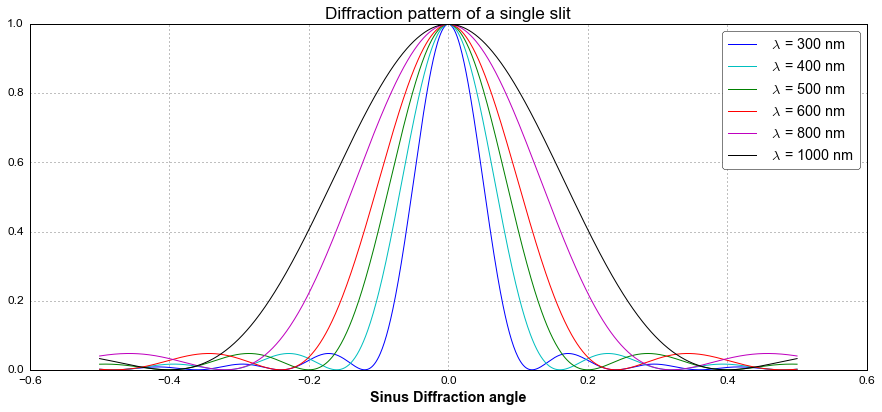

In [154]:
plt.figure(figsize=(15.,6.))
plt.plot(sin_theta,I0,'b-',label=' $\lambda$ = 300 nm')
plt.plot(sin_theta,I1,'c-',label=' $\lambda$ = 400 nm')
plt.plot(sin_theta,I2,'g-',label=' $\lambda$ = 500 nm')
plt.plot(sin_theta,I3,'r-',label=' $\lambda$ = 600 nm')
plt.plot(sin_theta,I4,'m-',label=' $\lambda$ = 800 nm')
plt.plot(sin_theta,I5,'k-',label=' $\lambda$ = 1000 nm')
plt.xlabel('Sinus Diffraction angle')
plt.title('Diffraction pattern of a single slit')
plt.legend()
plt.show()



## C) Light diffraction and interference by a multi-slit grating

Study the interference term alone first
$$
\alpha(\theta,\lambda)=\frac{a\pi}{\lambda}\sin\theta
$$




$$
I(\theta,\lambda)= I_0^2 \times \left\|\frac{\sin (\alpha(\theta,\lambda)N)} {\sin \alpha(\theta,\lambda)}\right\|^2
$$



In [155]:
def Interf_MultiSlit(sin_theta,wl=500*u.nm,lsp=5*u.um,N=1000):
    '''    
    Pure contribution of interferences without diffraction term
    input :
       sin_theta : numpy array of sinus of diffraction angles 
       wl        : wavelength that should be expressed in u.nm
       lsp       : line spacing u.um
       N         : total number of lines contributing to the interference
    '''    
    alpha=lsp*np.pi/wl*sin_theta
    thearg=np.array(alpha.decompose())   
    intensity=N**2*np.sinc(N*thearg/np.pi)**2/np.sinc(thearg/np.pi)**2
    return intensity
      

#### Calculate interference term for various wavelength

In [156]:
J=Interf_MultiSlit(sin_theta,wl=200*u.nm,lsp=5*u.um,N=200000)
J0=Interf_MultiSlit(sin_theta,wl=300*u.nm,lsp=5*u.um,N=200000)
J1=Interf_MultiSlit(sin_theta,wl=400*u.nm,lsp=5*u.um,N=200000)
J2=Interf_MultiSlit(sin_theta,wl=500*u.nm,lsp=5*u.um,N=200000)
J3=Interf_MultiSlit(sin_theta,wl=600*u.nm,lsp=5*u.um,N=200000)
J4=Interf_MultiSlit(sin_theta,wl=700*u.nm,lsp=5*u.um,N=200000)
J5=Interf_MultiSlit(sin_theta,wl=800*u.nm,lsp=5*u.um,N=200000)
J6=Interf_MultiSlit(sin_theta,wl=900*u.nm,lsp=5*u.um,N=200000)

#### Plot interference terms

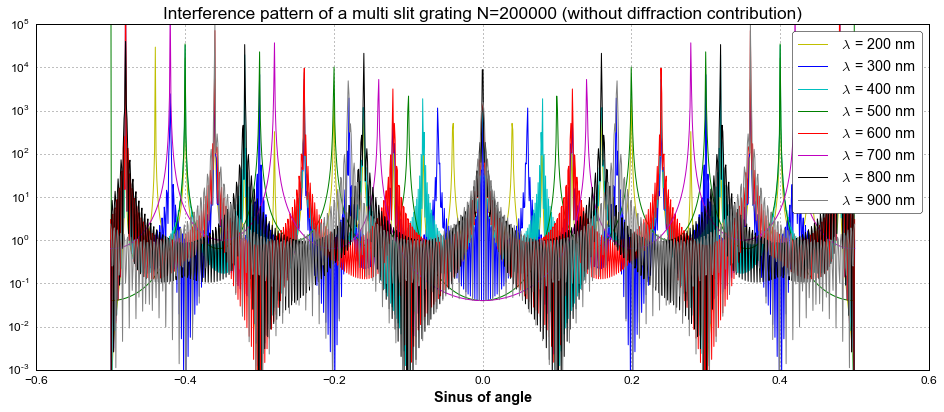

In [157]:
plt.figure(figsize=(16.,6.))
plt.semilogy(sin_theta,J,'y-',label=' $\lambda$ = 200 nm')
plt.semilogy(sin_theta,J0,'b-',label=' $\lambda$ = 300 nm')
plt.semilogy(sin_theta,J1,'c-',label=' $\lambda$ = 400 nm')
plt.semilogy(sin_theta,J2,'g-',label=' $\lambda$ = 500 nm')
plt.semilogy(sin_theta,J3,'r-',label=' $\lambda$ = 600 nm')
plt.semilogy(sin_theta,J4,'m-',label=' $\lambda$ = 700 nm')
plt.semilogy(sin_theta,J5,'k-',label=' $\lambda$ = 800 nm')
plt.semilogy(sin_theta,J6,'-',color='gray',label=' $\lambda$ = 900 nm')
plt.xlabel('Sinus of angle')
plt.ylim(1e-3,1e5)
plt.title('Interference pattern of a multi slit grating N=200000 (without diffraction contribution)')
plt.legend()
plt.show()

It is obvious that the total number of lines N has to be large in order to have a good line separation.
With N=200000 requires an almost FOV grating with a size of the order of 1m x 1m. 

## D) Combination of diffractive and interference terms

$$
I(\theta,\lambda)= I_0 \left\|\frac{\sin \beta(\theta,\lambda) }{\beta(\theta,\lambda)}\right\|^2 \times \left\|\frac{\sin (\alpha(\theta,\lambda)N)} {\sin \alpha(\theta,\lambda)}\right\|^2
$$


In [158]:
def DiffAndInterf_MultiSlit(sin_theta,wl=500*u.nm,wsl=2.5*u.um,lsp=5*u.um,N=200000):
    '''
    input :
       sin_theta : numpy array of sinus of diffraction angles 
       wl        : wavelength that should be expressed in u.nm
       wsl       : slit width that should be given in u.mm
       lsp       : line spacing u.um
       N         : total number of lines contributing to the interference
    '''
    
    beta=wsl*np.pi/wl*sin_theta
    thearg=np.array(beta.decompose())   
    I1=np.sinc(thearg/np.pi)**2
    
    alpha=lsp*np.pi/wl*sin_theta
    thearg=np.array(alpha.decompose())   
    I2=N**2*np.sinc(N*thearg/np.pi)**2/np.sinc(thearg/np.pi)**2
    
    I=I1*I2
    return I 

In [159]:
K=DiffAndInterf_MultiSlit(sin_theta,wl=200*u.nm,wsl=2.5*u.um,lsp=5*u.um,N=200000)
K0=DiffAndInterf_MultiSlit(sin_theta,wl=300*u.nm,wsl=2.5*u.um,lsp=5*u.um,N=200000)
K1=DiffAndInterf_MultiSlit(sin_theta,wl=400*u.nm,wsl=2.5*u.um,lsp=5*u.um,N=200000)
K2=DiffAndInterf_MultiSlit(sin_theta,wl=500*u.nm,wsl=2.5*u.um,lsp=5*u.um,N=200000)
K3=DiffAndInterf_MultiSlit(sin_theta,wl=600*u.nm,wsl=2.5*u.um,lsp=5*u.um,N=200000)
K4=DiffAndInterf_MultiSlit(sin_theta,wl=700*u.nm,wsl=2.5*u.um,lsp=5*u.um,N=200000)
K5=DiffAndInterf_MultiSlit(sin_theta,wl=800*u.nm,wsl=2.5*u.um,lsp=5*u.um,N=200000)
K6=DiffAndInterf_MultiSlit(sin_theta,wl=900*u.nm,wsl=2.5*u.um,lsp=5*u.um,N=200000)

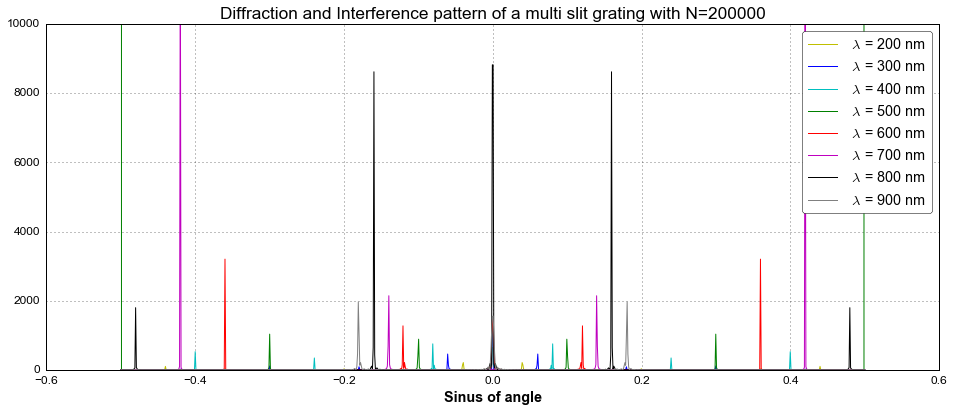

In [160]:
plt.figure(figsize=(16.,6.))
plt.plot(sin_theta,K,'y-',label=' $\lambda$ = 200 nm')
plt.plot(sin_theta,K0,'b-',label=' $\lambda$ = 300 nm')
plt.plot(sin_theta,K1,'c-',label=' $\lambda$ = 400 nm')
plt.plot(sin_theta,K2,'g-',label=' $\lambda$ = 500 nm')
plt.plot(sin_theta,K3,'r-',label=' $\lambda$ = 600 nm')
plt.plot(sin_theta,K4,'m-',label=' $\lambda$ = 700 nm')
plt.plot(sin_theta,K5,'k-',label=' $\lambda$ = 800 nm')
plt.plot(sin_theta,K6,'-',color='gray',label=' $\lambda$ = 900 nm')
plt.xlabel('Sinus of angle')
plt.ylim(1e-3,10000.)
plt.title('Diffraction and Interference pattern of a multi slit grating with N=200000')
plt.legend()
plt.show()

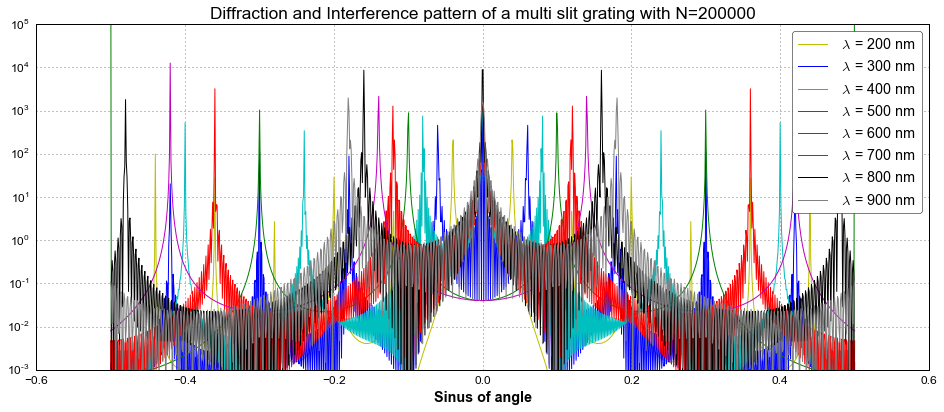

In [161]:
plt.figure(figsize=(16.,6.))
plt.semilogy(sin_theta,K,'y-',label=' $\lambda$ = 200 nm')
plt.semilogy(sin_theta,K0,'b-',label=' $\lambda$ = 300 nm')
plt.semilogy(sin_theta,K1,'c-',label=' $\lambda$ = 400 nm')
plt.semilogy(sin_theta,K2,'g-',label=' $\lambda$ = 500 nm')
plt.semilogy(sin_theta,K3,'r-',label=' $\lambda$ = 600 nm')
plt.semilogy(sin_theta,K4,'m-',label=' $\lambda$ = 700 nm')
plt.semilogy(sin_theta,K5,'k-',label=' $\lambda$ = 800 nm')
plt.semilogy(sin_theta,K6,'-',color='gray',label=' $\lambda$ = 900 nm')
plt.xlabel('Sinus of angle')
plt.ylim(1e-3,100000.)
plt.title('Diffraction and Interference pattern of a multi slit grating with N=200000')
plt.legend()
plt.show()

## E) Grating response versus wavelength

In [162]:
def DiffAndInterf_MultiSlit2(sinth,wl,wsl=2.5*u.um,lsp=5*u.um,N=200000):
    '''
    input :
       sin_theta : numpy array of sinus of diffraction angles 
       wl        : wavelength that should be expressed in u.nm
       wsl       : slit width that should be given in u.mm
       lsp       : line spacing u.um
       N         : total number of lines contributing to the interference
    '''
    
    beta=wsl*np.pi/wl*sinth
    thearg=np.array(beta.decompose())   
    I1=np.sinc(thearg/np.pi)**2
    
    alpha=lsp*np.pi/wl*sinth
    thearg=np.array(alpha.decompose())   
    I2=N**2*np.sinc(N*thearg/np.pi)**2/np.sinc(thearg/np.pi)**2
    
    I=I1*I2
    return I 

### defines wavelength

In [164]:
allwavelengthes=np.linspace(0.,1000.,400)
NBWL=allwavelengthes.shape[0]

### defines sin(theta)

In [166]:
sinus_theta_range=np.linspace(-0.3,0.3,400)
NBSIN=sinus_theta_range.shape[0]

### Build the array of intensities

In [168]:
all_gratingtransmission=np.zeros((NBWL,NBSIN))
for ind,wavel in np.ndenumerate(allwavelengthes):
    grating_transmission=DiffAndInterf_MultiSlit(sinus_theta_range,wl=wavel*u.nm,wsl=2.5*u.um,lsp=5*u.um,N=200000)
    all_gratingtransmission[ind,:]=grating_transmission

### View the array

Note the axis give the pixels

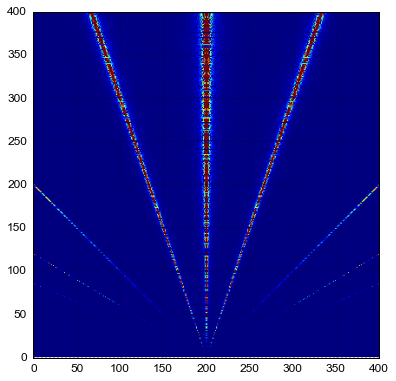

In [181]:
plt.figure(figsize=(16,6))
plt.imshow(all_gratingtransmission,vmax=1e2,origin='bottom')

### Intensity in log scale versus wavelength and sin(theta)

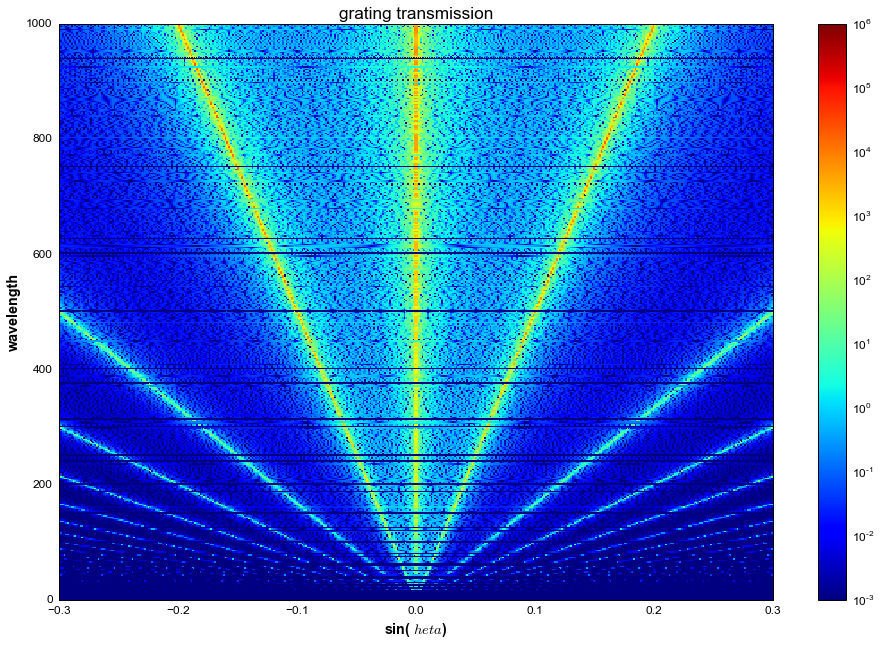

In [178]:
plt.figure(figsize=(16,10))
Xgr,Ygr=np.meshgrid(allwavelengthes,sinus_theta_range)
im = plt.pcolormesh(Ygr,Xgr,all_gratingtransmission.T, norm=colors.LogNorm(vmin=1e-3, vmax=1e6))
plt.colorbar(im, orientation='vertical')
plt.axis([-0.3, 0.3,0, 1000.])

plt.xlabel('sin( ${\theta}$)')
plt.ylabel('wavelength')
title="grating transmission"
plt.title(title)
plt.show()
    

### Intensity in linear scale versus wavelength and sin(theta)

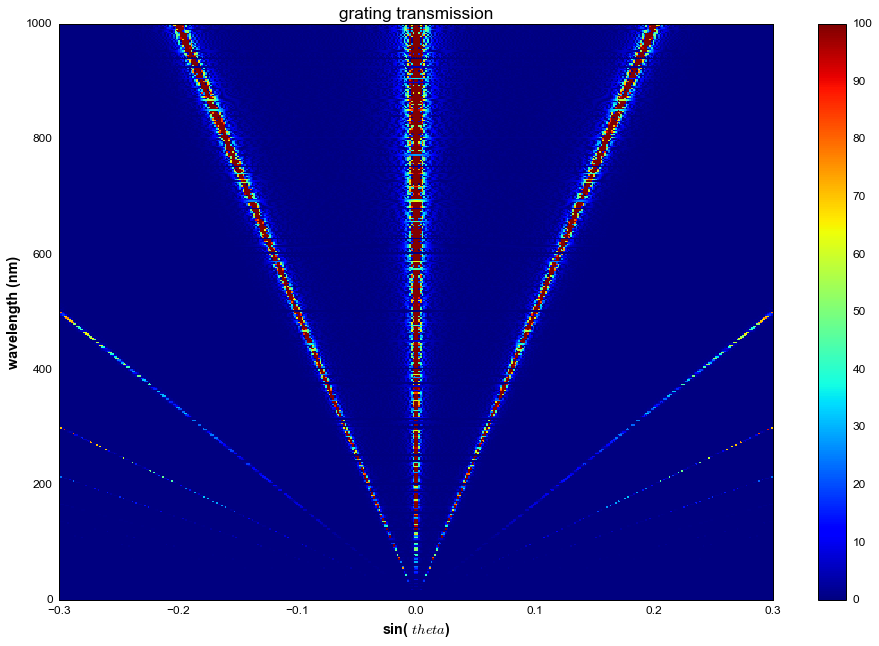

In [186]:
plt.figure(figsize=(16,10))
Xgr,Ygr=np.meshgrid(allwavelengthes,sinus_theta_range)
im = plt.pcolormesh(Ygr,Xgr,all_gratingtransmission.T, vmin=0, vmax=1e2)
plt.colorbar(im, orientation='vertical')
plt.axis([-0.3, 0.3,0, 1000.])

plt.xlabel('sin( ${theta}$)')
plt.ylabel('wavelength (nm)')
title="grating transmission"
plt.title(title)
plt.show()